Simple Linear Regression

In this notebook, a simple linear regression model is built to predict the salary using an years of experience.
*   Reading and Understanding the Data
*   Training the model
*   Residual Analysis
*   Predicting and evaluating the model on the test set


# **Step 1: Reading and Understanding the Data**

In [2]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

# import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
# read the data
data = pd.read_csv('/content/drive/MyDrive/Salary_dataset.csv')
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
# drop the first column as it is redundant
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [5]:
# shape of the data
data.shape

(30, 2)

There are 30 rows and 2 columns present in the data.

In [6]:
# info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
# statistical summary of the dataset
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [8]:
# missing values in the data
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

There are no missing values in the data.

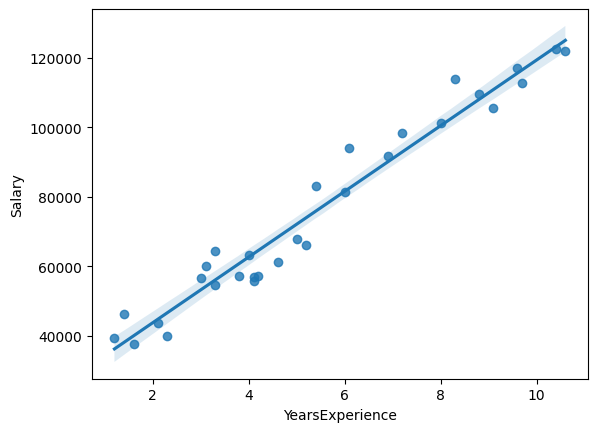

In [9]:
# Visualise the data using regression plot
sns.regplot(x = 'YearsExperience', y = 'Salary', data = data)
plt.show()

From the above regression plot, it is clear that Experience and Salary are linearly correlated.

# **Step 2: Performing Simple Linear Regression**

The equation of simple linear regression is:

*y = mx + c*

where,

y is the dependent (outcome or response) variable
m is the slope of the line
x is the independent (predictor) variable
c is the y-intercept of the line

Here, the independent variable is 'YearsExperience' and dependent variable is 'Salary'.

Steps of model building:
* Create X and y
* create train and test sets
* Train the model on training set (i.e. learn the coefficients)
* Evaluate the model on the test set

In [10]:
# create X and y
X = data['YearsExperience']
y = data['Salary']

In [11]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.67, random_state = 20)

print('The shape of X_train is ', X_train.shape)
print('The shape of X_test is ', X_test.shape)
print('The shape of y_train is ', y_train.shape)
print('The shape of y_test is ', y_test.shape)

The shape of X_train is  (20,)
The shape of X_test is  (10,)
The shape of y_train is  (20,)
The shape of y_test is  (10,)


The statsmodels uses the 'Ordinary Least Squares' to fit the line. By default, the statsmodels library doesn't include the intercept. It only includes the coefficient of the predictor variables. We need to add the y-intercept explicitely in the statsmodels so we use the command 'add_constant' to fit an intercept. If we don't fit an intercept, the statmodels will fit a line passing through the origin.

In [12]:
# training the model using statsmodels
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,YearsExperience
21,1.0,7.2
5,1.0,3.0
25,1.0,9.1
19,1.0,6.1
14,1.0,4.6


In [13]:
# fitting the model
lr = sm.OLS(y_train, X_train_sm)   # This creates a Linear Regression Object
lr_model = lr.fit()
lr_model.params

const              25420.429429
YearsExperience     9410.062247
dtype: float64

In [14]:
# summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     368.9
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           1.94e-13
Time:                        07:17:12   Log-Likelihood:                -200.32
No. Observations:                  20   AIC:                             404.6
Df Residuals:                      18   BIC:                             406.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.542e+04   2827.780      8.990      0.000    1.95e+04    3.14e+04
YearsExperience  9410.0622    489.957     19.206      0.000    8380.700    1.04e+04
==============================================================================
Omnibus:                        0.672   Durbin-Watson:                   2.894
Prob(Omnibus):                  0.715   Jarque-Bera (JB):                0.686
Skew:                           0.200   Prob(JB):                        0.710
Kurtosis:                       2.186   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value is 0. It means that, the coefficients are significant. The relationship between the number of years of experience and salary is not obtained purely by chance, there is a real statistically significant relationship. The p-value below 0.001 is considered as very low.

The R-squared is 0.953. It means that, the 95% of the variance in the data is explained by the model.

F-statistic tells us whether the overall model fit is significant or not. This parameter is examined because many a time it happens that even though all of betas are significant, but the overall model fit might happen just by chance. If the P(F-statistic) is less than 0.05 then the overall model fit is significant. The p-value of the F-statistic is 1.94e-13, which is practically a zero value. This shows that the model fit is significant since it is less than 0.05.



In [15]:
# make predictions on the training set
y_train_pred = lr_model.predict(X_train_sm)

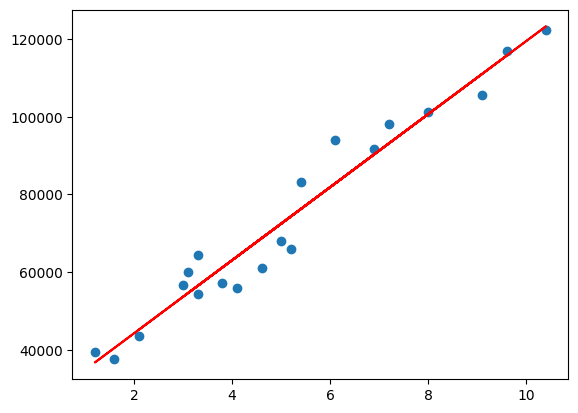

In [16]:
# plot the model
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, color = 'r')
plt.show()

# **Step 3: Residual Analysis**

In [17]:
# residual
res = y_train - y_train_pred

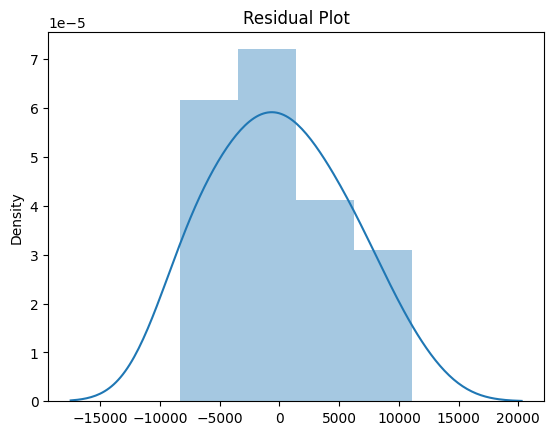

In [18]:
# plot the residuals
sns.distplot(res)
plt.title('Residual Plot')
plt.show()

The center of the normal distribution is around zero. The shape is also looks like a normal distribution.

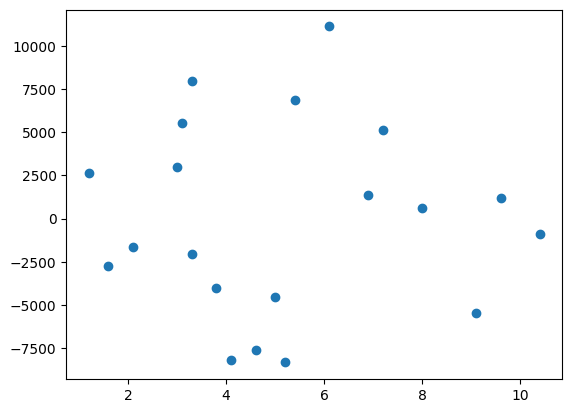

In [19]:
# look for patterns in residuals (we should not able to identify any patterns)
plt.scatter(X_train, res)
plt.show()

# **Step 4: Predictions and Evaluation on the Test Set**

In [20]:
# add a constant/intercept to the test set
X_test_sm = sm.add_constant(X_test)

# make prediction on test set
y_test_pred = lr_model.predict(X_test_sm)

In [21]:
# evaluate the model on the training and test set
print('The R-squared for the training set is', round(r2_score(y_true = y_train, y_pred = y_train_pred), 2))
print('The R-squared for the test set is', round(r2_score(y_true = y_test, y_pred = y_test_pred), 2))

The R-squared for the training set is 0.95
The R-squared for the test set is 0.96


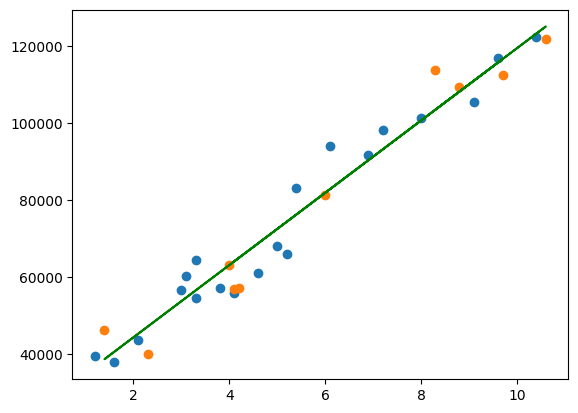

In [22]:
# plot the model with the test set
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, color = 'g')
plt.show()